In [3]:
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'seaborn'

In [3]:
var_description = pd.read_csv('../data/quarterly_var_names.csv')
var_description.tail()

,Variable Name,Type,Description
669,DVPSXQ,Float,Div per Share - Exdate - Quarter (dvpsxq)
670,MKVALTQ,Float,Market Value - Total (mkvaltq)
671,PRCCQ,Float,Price Close - Quarter (prccq)
672,PRCHQ,Float,Price High - Quarter (prchq)
673,PRCLQ,Float,Price Low - Quarter (prclq)


In [18]:
df = pd.read_csv('../data/quarterly_fundamentals.csv')
df.tail()

,gvkey,datadate,fyearq,fqtr,fyr,indfmt,consol,popsrc,datafmt,tic,...,priusa,sic,spcindcd,spcseccd,spcsrc,state,stko,weburl,dldte,ipodate
843,170617,2022-12-31,2022,4,12,INDL,C,D,STD,META,...,1,7370,NaN,NaN,B+,CA,0,investor.fb.com,NaN,2012-05-18
844,170617,2023-03-31,2023,1,12,INDL,C,D,STD,META,...,1,7370,NaN,NaN,B+,CA,0,investor.fb.com,NaN,2012-05-18
845,170617,2023-06-30,2023,2,12,INDL,C,D,STD,META,...,1,7370,NaN,NaN,B+,CA,0,investor.fb.com,NaN,2012-05-18
846,170617,2023-09-30,2023,3,12,INDL,C,D,STD,META,...,1,7370,NaN,NaN,B+,CA,0,investor.fb.com,NaN,2012-05-18
847,170617,2023-12-31,2023,4,12,INDL,C,D,STD,META,...,1,7370,NaN,NaN,B+,CA,0,investor.fb.com,NaN,2012-05-18


In [19]:
df.dtypes[:10]

gvkey        int64
datadate    object
fyearq       int64
fqtr         int64
fyr          int64
indfmt      object
consol      object
popsrc      object
datafmt     object
tic         object
dtype: object

# Outlier

In [20]:
non_normal = []
for name in df.columns[67:]:
    try:
        measurements = df[name]
        stat,p = scipy.stats.normaltest(measurements)
        if p < 0.05:
            non_normal.append(name)
    except:
        print(name, "not float")
print("found", len(non_normal), "non-normals:")
non_normal

costat not float
fic not float
add1 not float
addzip not float
busdesc not float
city not float
conml not float
ein not float
idbflag not float
incorp not float
loc not float
phone not float
spcsrc not float
state not float
weburl not float
ipodate not float
found 58 non-normals:


['csh12q',
 'cshfd12',
 'cshfdq',
 'cshprq',
 'cstkeq',
 'diladq',
 'dilavq',
 'doq',
 'dvpq',
 'epsfiq',
 'epsfxq',
 'epspiq',
 'epspxq',
 'ibadjq',
 'ibcomq',
 'ibq',
 'niq',
 'oepsxq',
 'opepsq',
 'revtq',
 'saleq',
 'xidoq',
 'xiq',
 'xsgaq',
 'acchgy',
 'cshfdy',
 'cshpry',
 'cstkey',
 'dilady',
 'dilavy',
 'doy',
 'dvpy',
 'epsfiy',
 'epsfxy',
 'epspiy',
 'epspxy',
 'ibadjy',
 'ibcomy',
 'iby',
 'niy',
 'oepsxy',
 'opepsy',
 'revty',
 'saley',
 'xidoy',
 'xiy',
 'xsgay',
 'exchg',
 'cik',
 'fyrc',
 'ggroup',
 'gind',
 'gsector',
 'gsubind',
 'naics',
 'priusa',
 'sic',
 'stko']

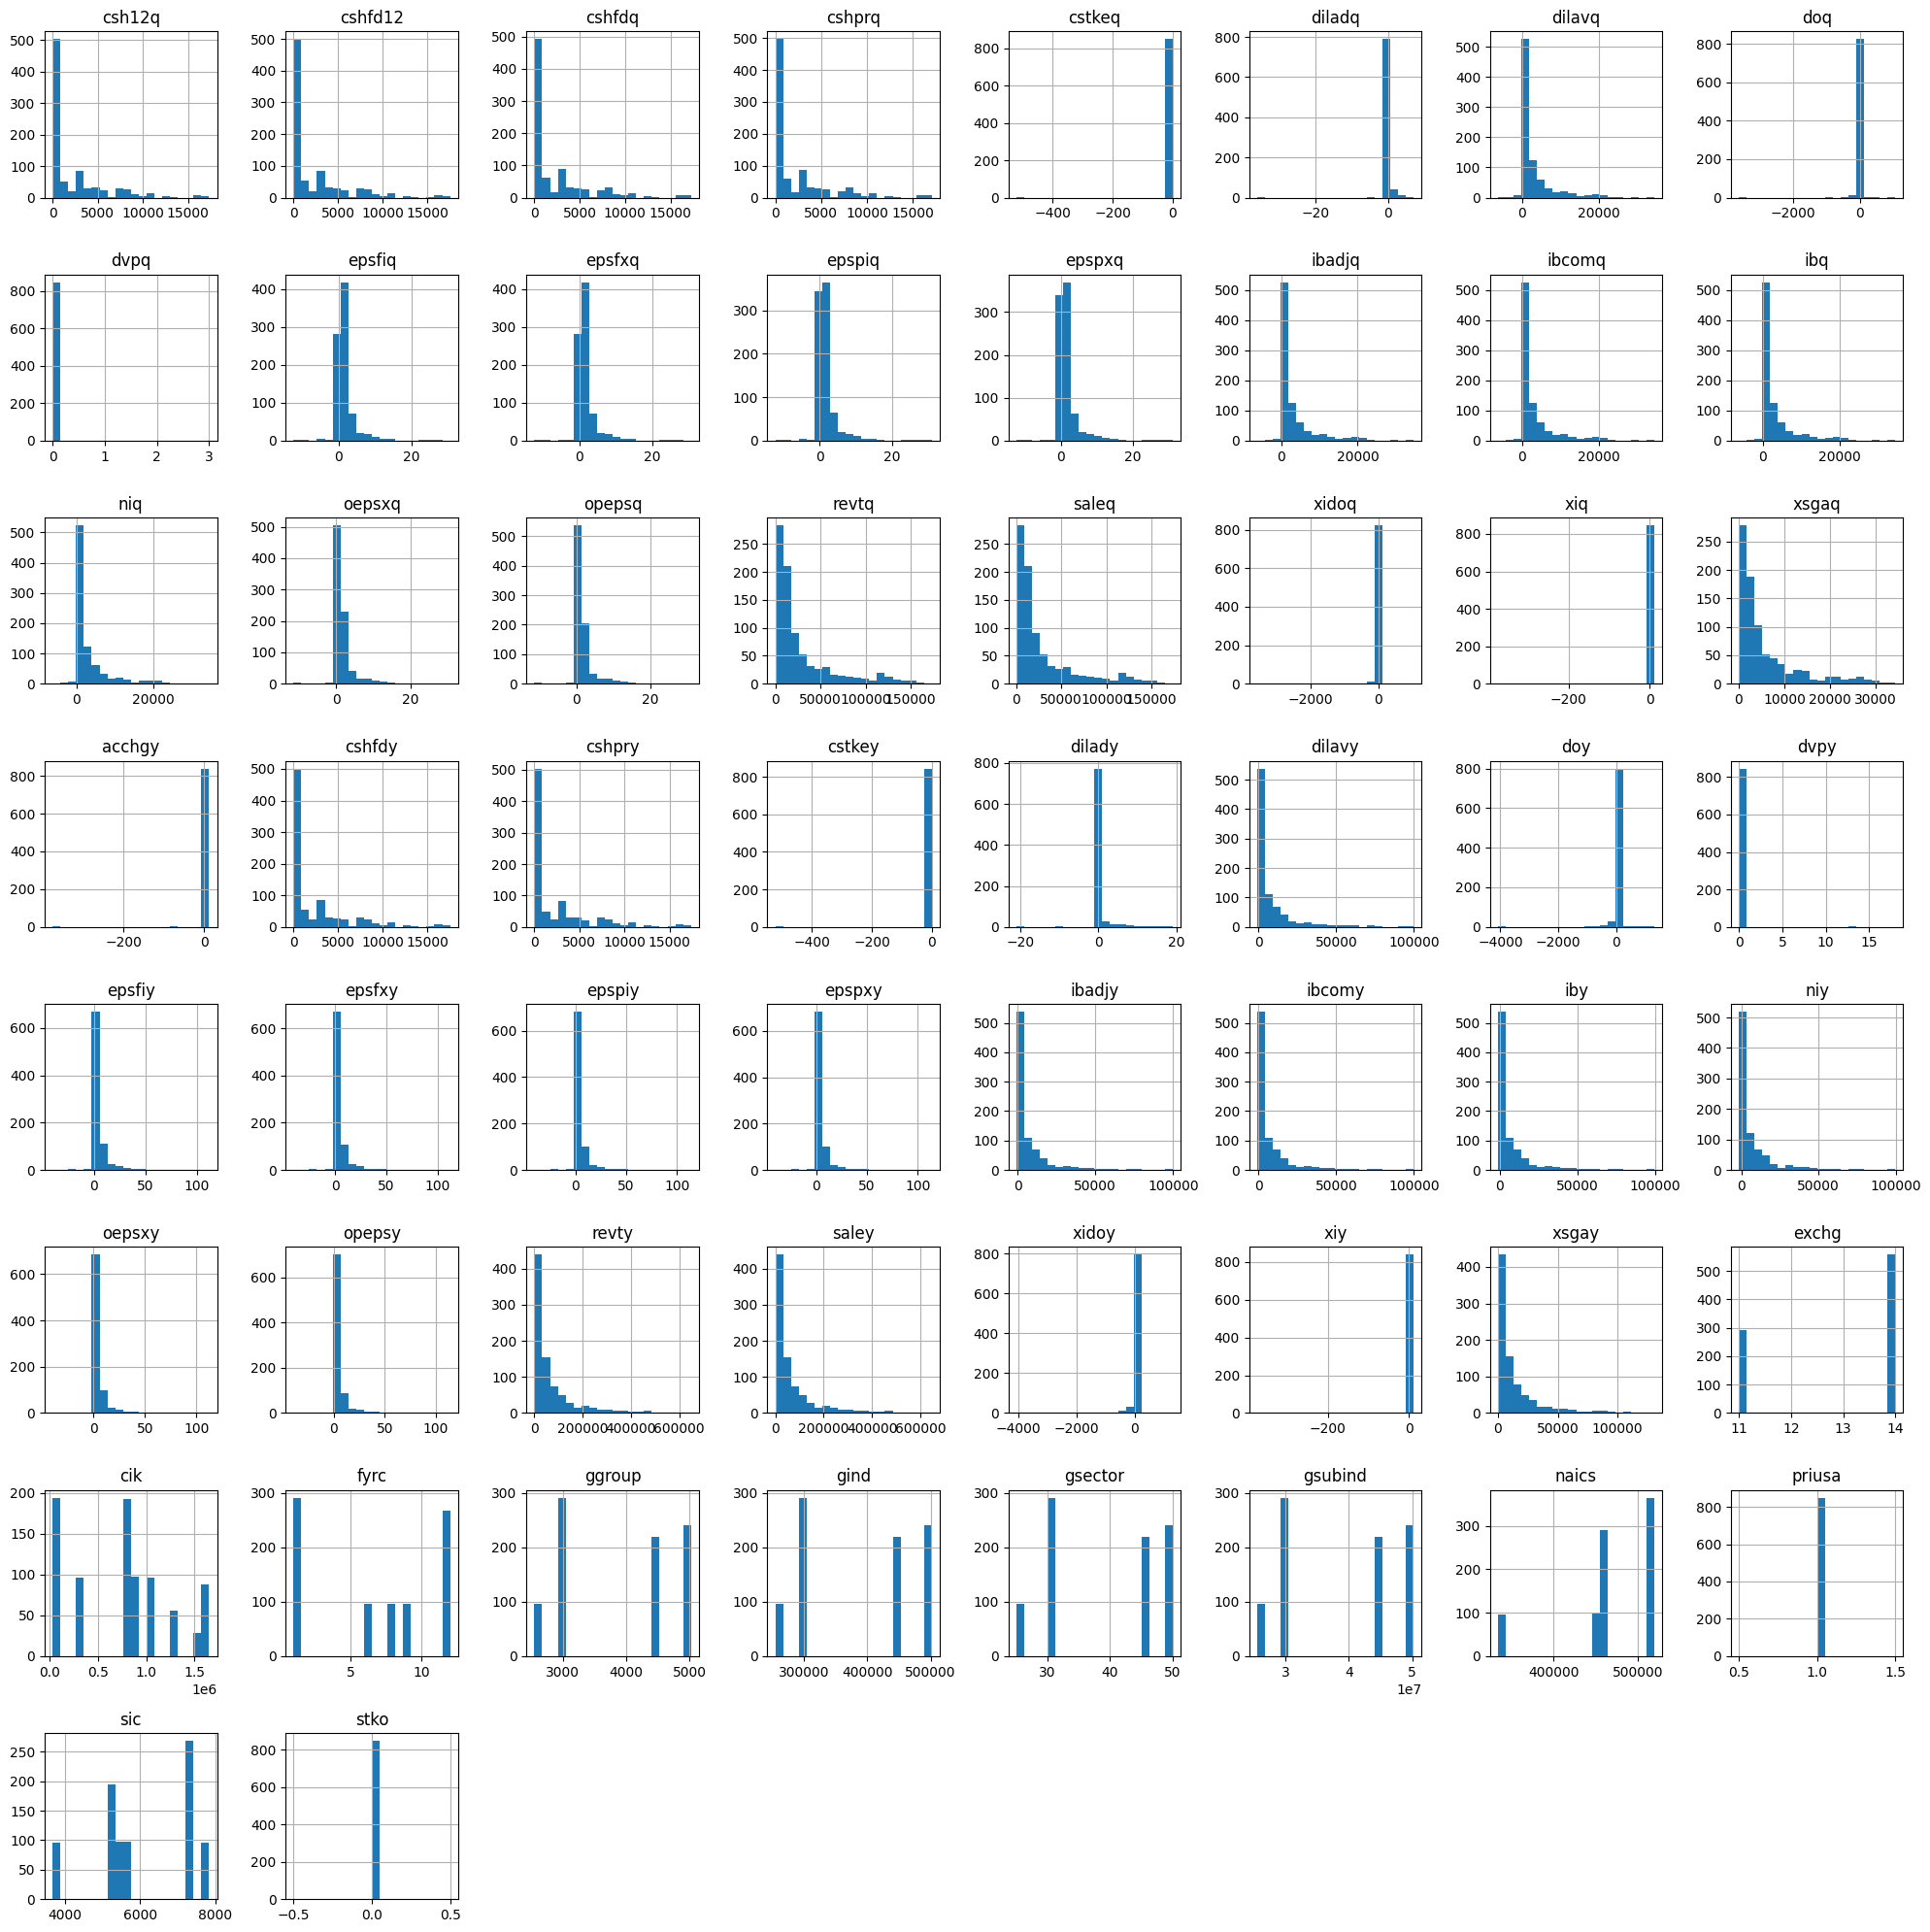

In [47]:
df.hist(column=non_normal, figsize=(20,20), bins=20)
plt.tight_layout()
plt.show()

In [52]:
test_col = df[["epsfxq"]]

<AxesSubplot:>

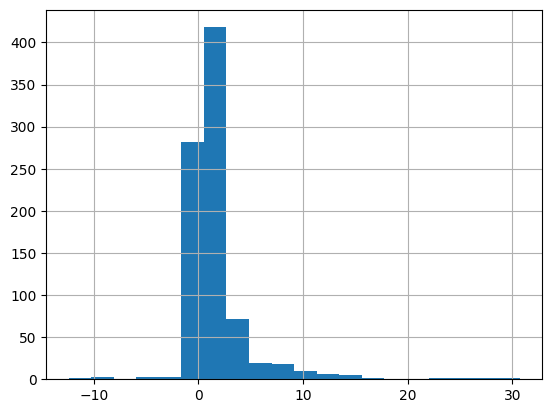

In [9]:
test_col.hist(bins=20)

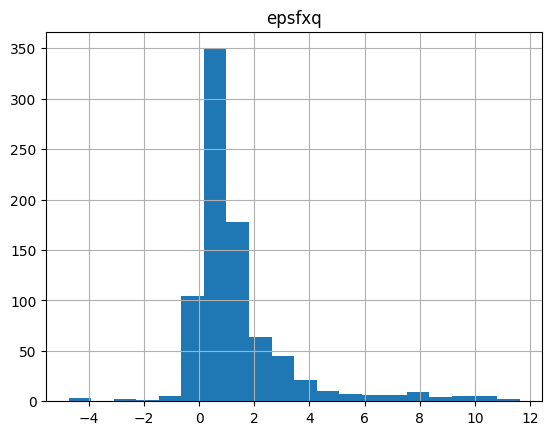

In [54]:
test_col[np.abs(scipy.stats.zscore(test_col)) < 3].hist(bins=20)
plt.savefig('zscore.jpg')

In [44]:
from sklearn.svm import OneClassSVM
clf = OneClassSVM(gamma='auto').fit(test_col.values.reshape(-1, 1))
test_col["svm"] = clf.predict(test_col.values.reshape(-1, 1))


/Users/hanz/Desktop/Code/ECON3140/econ3140-env/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


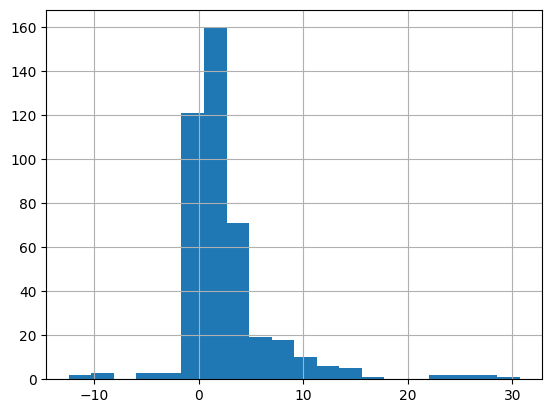

In [51]:
test_col.loc[test_col["svm"] == -1, 'epsfxq'].hist(bins=20)
plt.savefig('svm.jpg')

In [48]:
from sklearn.ensemble import IsolationForest
clf = IsolationForest(random_state=0).fit(test_col['epsfxq'].values.reshape(-1, 1))
test_col["iforest"] = clf.predict(test_col['epsfxq'].values.reshape(-1, 1))

/Users/hanz/Desktop/Code/ECON3140/econ3140-env/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


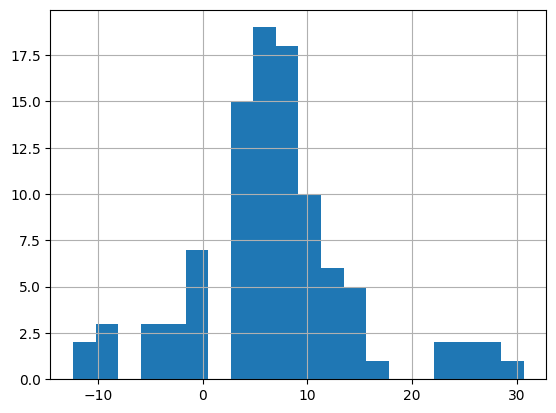

In [50]:
test_col.loc[test_col["iforest"] == -1, 'epsfxq'].hist(bins=20)
plt.savefig('iforest.jpg')

In [ ]:
# do I transform ? clip / noramlize / log
# do I replace ( mean/median/mode/constant, nearest neighbour, regress, random sample, interpolate/extrapolate)

# Missing

In [66]:
m = df.count() / len(df) # not missing %

In [79]:
m[(m>0.05) & (m<0.5)]

compstq       0.115566
billexceq     0.064858
capsftq       0.058962
deracq        0.265330
deraltq       0.182783
                ...   
txachy        0.491745
txdiy         0.247642
xoptdqpy      0.498821
xoptepsqpy    0.498821
xoptqpy       0.498821
Length: 178, dtype: float64

In [ ]:
# how to impute (median? mean? forecast?)?
# whether to ignore? 

# Colinearity & Model Assumptions